# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [7]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.97726326 2.92587894 2.44820814 2.59887369 2.02680464 2.38459236
 2.53359772 2.17217559 2.7228578  2.49643141]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [10]:
def generate_uniform_random(bottom, ceiling, count):
    x = np.random.rand(count)
    randoms = bottom + (ceiling - bottom) * x
    return randoms

In [11]:
bottom1 = 10
ceiling1 = 15
count1 = 100

bottom2 = 10
ceiling2 = 60
count2 = 1000

In [12]:
randoms1 = generate_uniform_random(bottom1, ceiling1, count1)
randoms2 = generate_uniform_random(bottom2, ceiling2, count2)

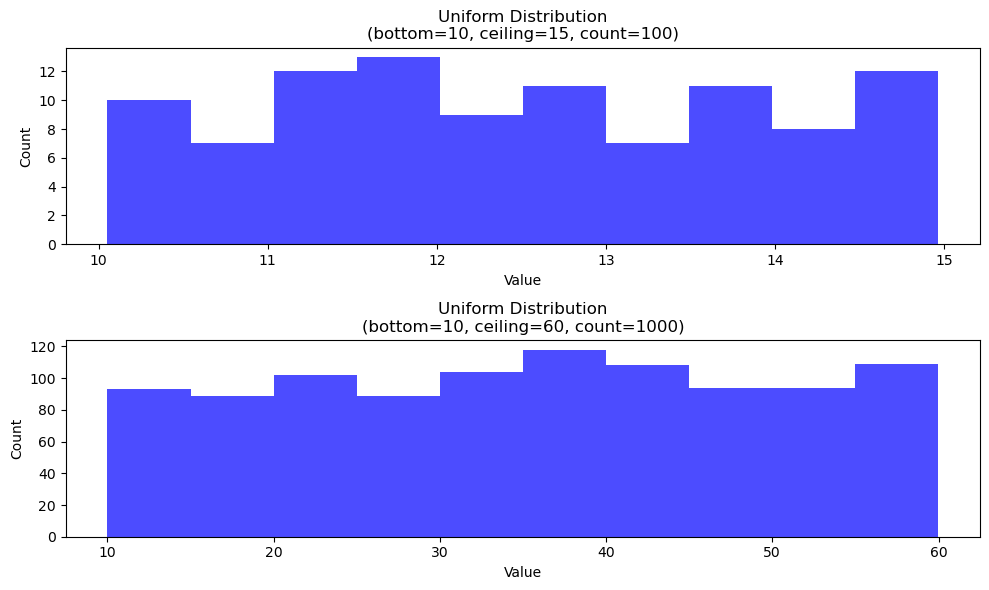

In [13]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(randoms1, bins=10, color='blue', alpha=0.7)
plt.title('Uniform Distribution\n(bottom=10, ceiling=15, count=100)')
plt.xlabel('Value')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
plt.hist(randoms2, bins=10, color='blue', alpha=0.7)
plt.title('Uniform Distribution\n(bottom=10, ceiling=60, count=1000)')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

How are the two distributions different?

In [ ]:
#the key difference lies in the range and the count of the generated random numbers, which affects how evenly the values are spread out and how smooth the distribution appears in the histograms.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [14]:
def generate_normal_random(mean, std_dev, count):
    randoms = np.random.normal(mean, std_dev, count)
    return randoms

In [15]:
mean1 = 10
std_dev1 = 1
count1 = 1000

mean2 = 10
std_dev2 = 50
count2 = 1000

In [16]:
randoms1 = generate_normal_random(mean1, std_dev1, count1)
randoms2 = generate_normal_random(mean2, std_dev2, count2)

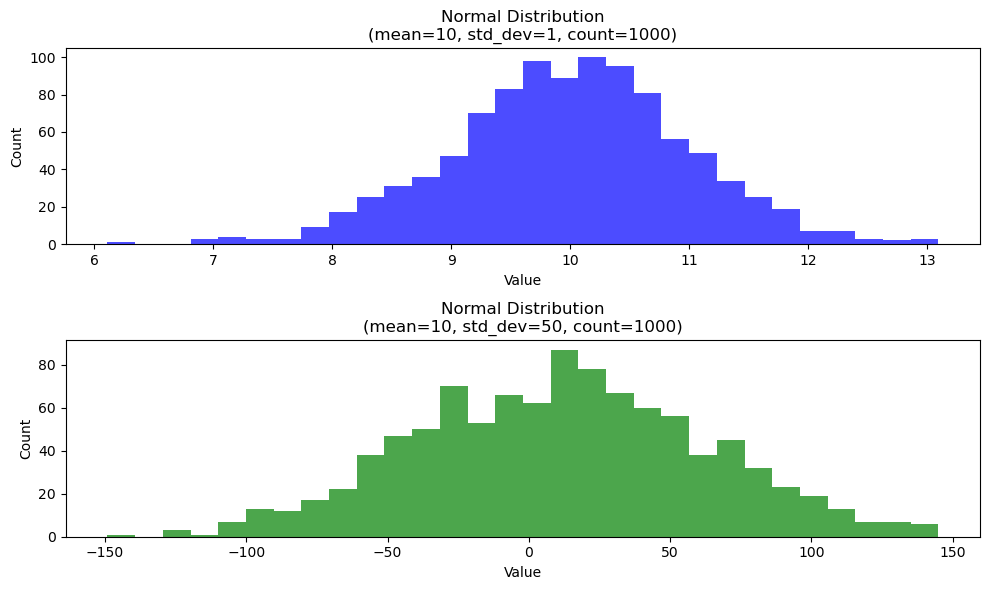

In [17]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(randoms1, bins=30, color='blue', alpha=0.7)
plt.title('Normal Distribution\n(mean=10, std_dev=1, count=1000)')
plt.xlabel('Value')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
plt.hist(randoms2, bins=30, color='green', alpha=0.7)
plt.title('Normal Distribution\n(mean=10, std_dev=50, count=1000)')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

How are the two distributions different?

In [ ]:
#the standard deviation controls the spread or variability of data points in a normal distribution. A larger standard deviation leads to a wider spread of values, while a smaller standard deviation results in a narrower distribution around the mean.


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [18]:
import pandas as pd
df = pd.read_csv('vehicles.csv')

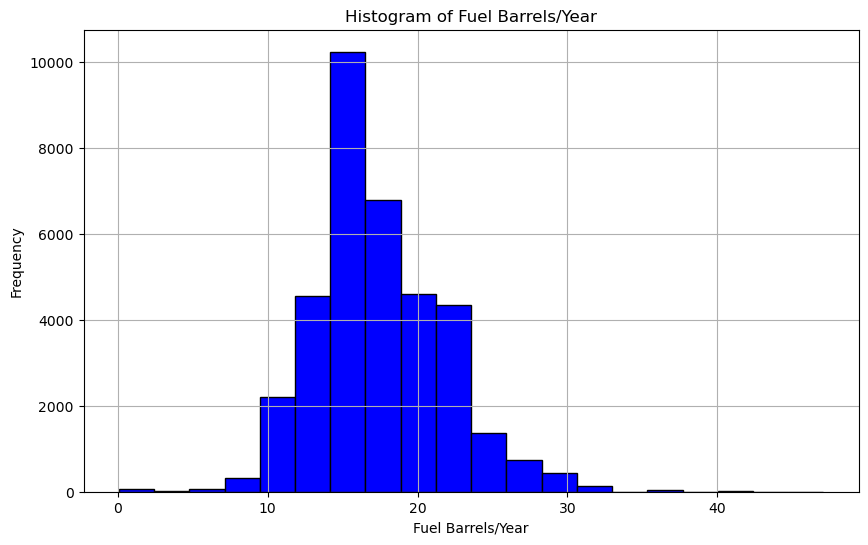

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fuel Barrels/Year'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Fuel Barrels/Year')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2. CO2 Emission Grams/Mile 

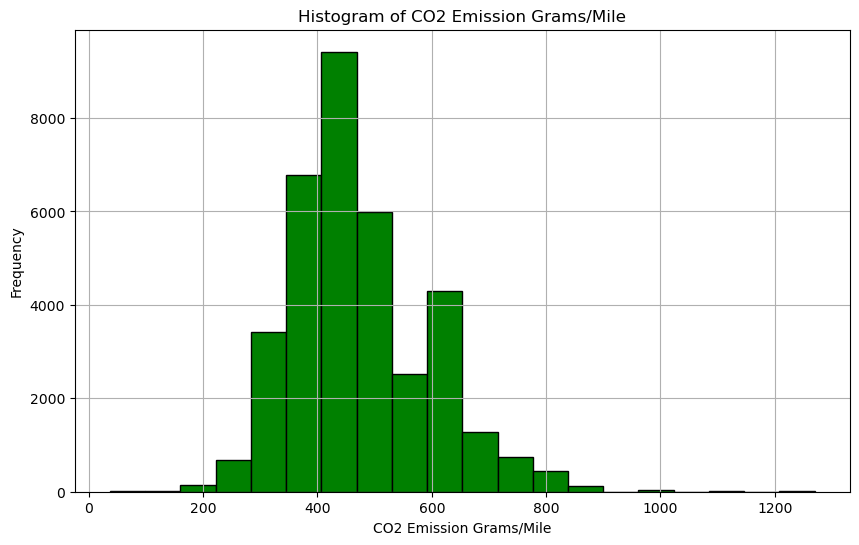

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['CO2 Emission Grams/Mile'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of CO2 Emission Grams/Mile')
plt.xlabel('CO2 Emission Grams/Mile')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

3. Combined MPG

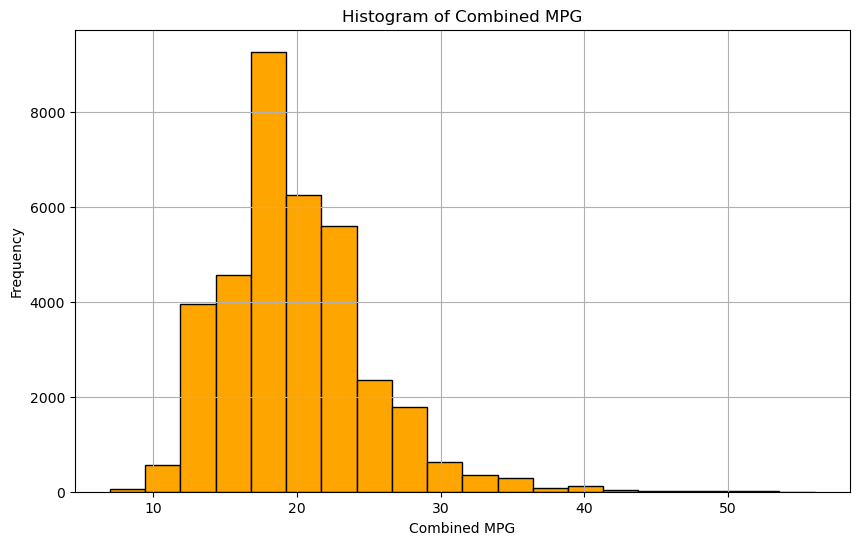

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['Combined MPG'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Combined MPG')
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
#Combined MPG. because the columns are with similar values

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [22]:
def generate_exponential(mean, size):
    return np.random.exponential(scale=mean, size=size)

In [23]:
mean_1 = 1
mean_100 = 100
size = 1000

In [24]:
exp_dist_1 = generate_exponential(mean_1, size)
exp_dist_100 = generate_exponential(mean_100, size)

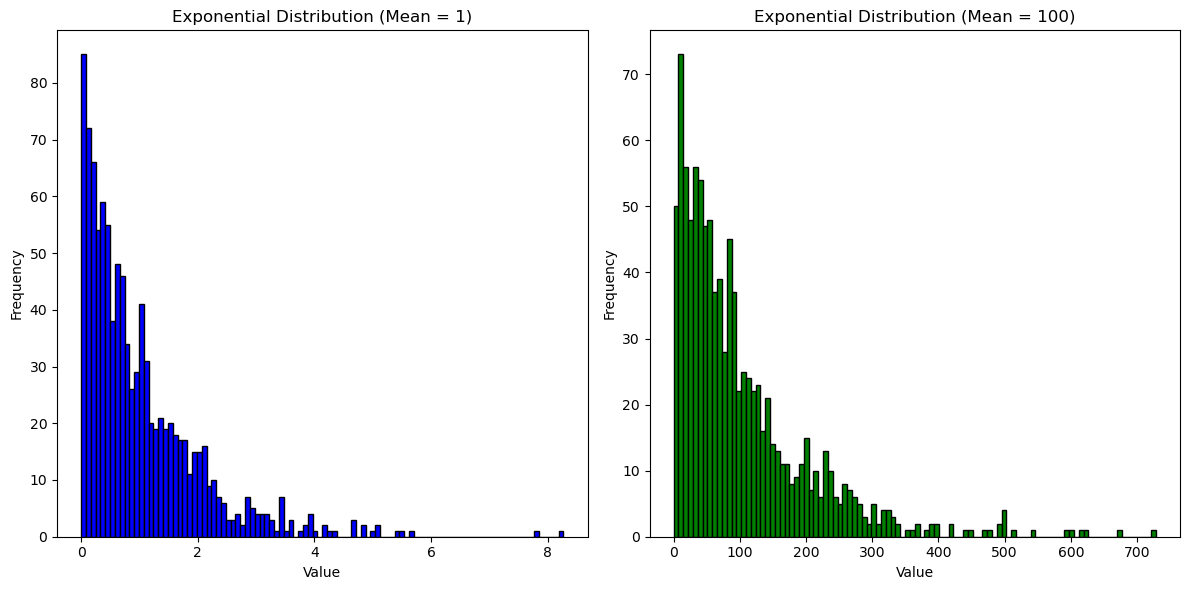

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(exp_dist_1, bins=100, color='blue', edgecolor='black')
plt.title(f'Exponential Distribution (Mean = {mean_1})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(exp_dist_100, bins=100, color='green', edgecolor='black')
plt.title(f'Exponential Distribution (Mean = {mean_100})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

How are the two distributions different?

In [ ]:
#The distribution with a larger mean (100) will have a slower decay and a more prominent central peak compared to the distribution with a smaller mean (1)


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [26]:
# your answer here
# Hint: This is same as saying P(x<15)
def exponential_cdf(x, mean):
    
    rate = 1 / mean
    
    
    cdf = 1 - np.exp(-rate * x)
    return cdf

mean = 10  
x = 15    

probability = exponential_cdf(x, mean)
print(f"The probability that a customer will spend less than {x} minutes in the bank: {probability:.4f}")

The probability that a customer will spend less than 15 minutes in the bank: 0.7769


What is the probability that the customer will spend more than 15 minutes

In [27]:
def probability_more_than(x, mean):
    return 1 - exponential_cdf(x, mean)

mean = 10  
x = 15     

probability = probability_more_than(x, mean)
print(f"The probability that a customer will spend more than {x} minutes in the bank: {probability:.4f}")

The probability that a customer will spend more than 15 minutes in the bank: 0.2231
